# Decision Tree Model

Author: Jindal K. Shah, School of Chemical Engineering, Oklahoma State University

Data Science Workshop, April 26, 2024


In this Google colab, we will use a decision tree model to predict the boiling point data for organic compounds. The dataset was acquired from the paper

Journal of Chemical Education, 96(4), 697-703, 2019

In [ ]:
import numpy as np
from google.colab import files
uploaded = files.upload()


Saving boiling_point_small.csv to boiling_point_small.csv


In [ ]:
import pandas as pd
import io

# read the data as a pandas dataframe
df = pd.read_csv(io.BytesIO(uploaded['boiling_point_small.csv']))


In [ ]:
# let us look at the data
df.describe()

,Unnamed: 0,molweight,critical temperature (K),acentric factor,boiling point (K),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0
mean,50.500000,157.134262,634.884000,0.521700,448.513700,NaN,NaN,NaN,NaN
std,29.011492,93.589816,118.079564,0.182879,97.891808,NaN,NaN,NaN,NaN
min,1.000000,58.080040,374.180000,0.224000,247.080000,NaN,NaN,NaN,NaN
25%,25.750000,102.165720,569.000000,0.341000,403.000000,NaN,NaN,NaN,NaN
50%,50.500000,134.134998,631.000000,0.508000,436.225000,NaN,NaN,NaN,NaN
75%,75.250000,162.274920,697.150000,0.709250,486.237500,NaN,NaN,NaN,NaN
max,100.000000,547.682640,992.100000,0.844000,693.150000,NaN,NaN,NaN,NaN


In [ ]:
# Let us look at the data
df.columns

Index(['Unnamed: 0', 'name', 'molweight', 'critical temperature (K)',
       'acentric factor', 'boiling point (K)', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [ ]:
# Form the feature vector and the output vector
x_features = df[['molweight','critical temperature (K)', 'acentric factor']]
y = df['boiling point (K)']



In [ ]:
# let's start building the model by splitting the data into a train and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features, y, train_size=0.8,random_state=100)


In [ ]:
# start building a decision tree model
from sklearn import tree
import matplotlib.pyplot as plt
bp_model = tree.DecisionTreeRegressor(min_samples_leaf=3)
bp_model_fit = bp_model.fit(x_train,y_train)
y_predict = bp_model_fit.predict(x_train)
y_test_predict = bp_model_fit.predict(x_test)




Text(0.5, 1.0, 'Training Data Set')

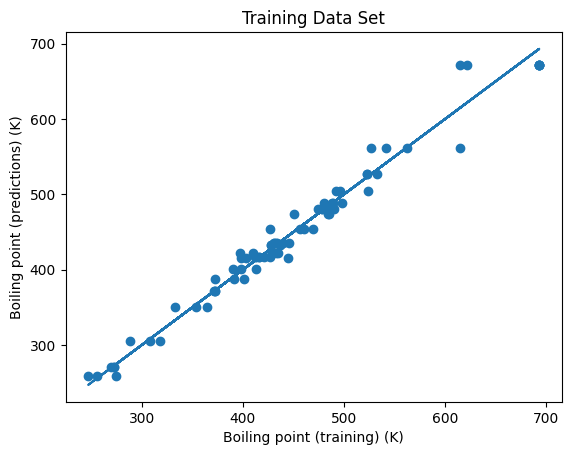

In [ ]:
# parity plot for training data set
plt.scatter(y_train,y_predict)
plt.plot(y_train,y_train)
plt.xlabel('Boiling point (training) (K)')
plt.ylabel('Boiling point (predictions) (K)')
plt.title('Training Data Set')

In [ ]:
this_score = bp_model.score(x_train,y_train)
print("The score of the model %8.3f "  % (this_score))

The score of the model    0.975 


Text(0.5, 1.0, 'Test Data Set')

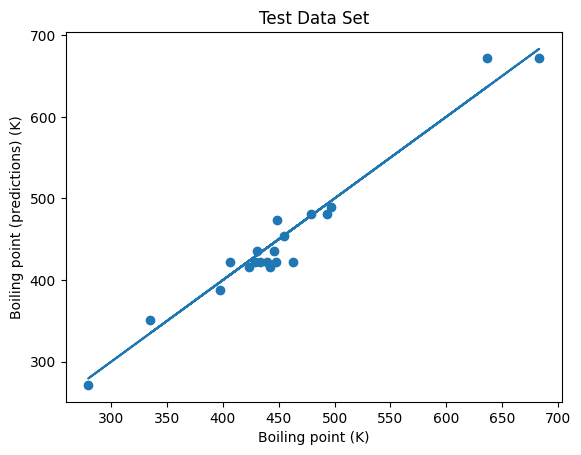

In [ ]:
# parity plot for training data set
plt.scatter(y_test,y_test_predict)
plt.plot(y_test,y_test)
plt.xlabel('Boiling point (K)')
plt.ylabel('Boiling point (predictions) (K)')
plt.title('Test Data Set')

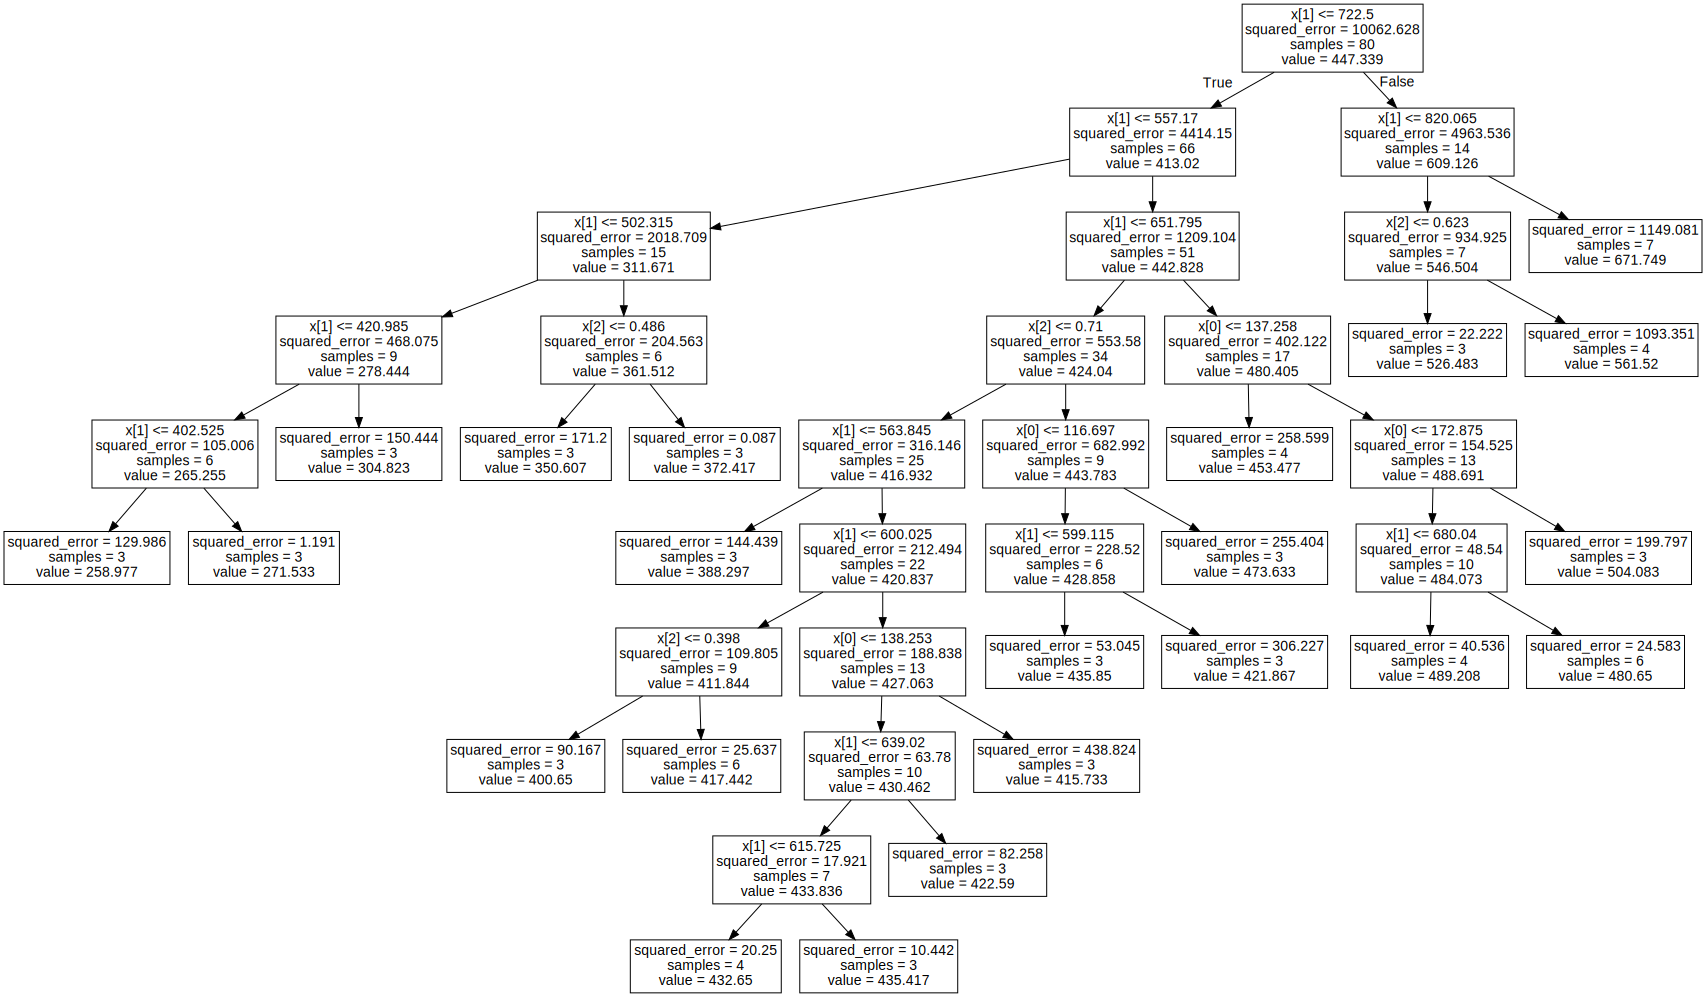

In [ ]:
# we want to visualize the tree

import graphviz
dot_data = tree.export_graphviz(bp_model_fit,out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Let's develop a random forest model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_predict_rf = rf_model.predict(x_train)

In [ ]:
bp_model.feature_importances_

array([0.01175657, 0.97785545, 0.01038798])

In [ ]:
bp_model.feature_names_in_

array(['molweight', 'critical temperature (K)', 'acentric factor'],
      dtype=object)

<BarContainer object of 3 artists>

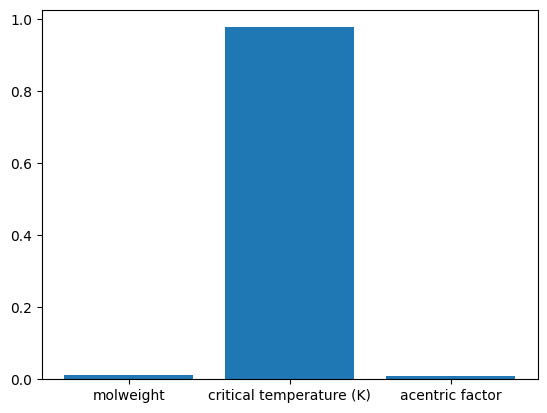

In [ ]:
plt.bar(bp_model.feature_names_in_,bp_model.feature_importances_)